<a href="https://colab.research.google.com/github/rjz46/Cornell-Conversational-Analysis-Toolkit/blob/master/datasets/reddit_coarse_discourse-corpus/A1E_Upvote_Toxicity_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and setup

In [78]:
from IPython.display import display as disp
from zipfile import ZipFile
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections

print("""\n***IGNORE ANY ERROR about 'reload_ext' - for some reason it breaks 
autoreload and it's not necessary. \n\n""")
%load_ext autoreload


***IGNORE ANY ERROR about 'reload_ext' - for some reason it breaks 
autoreload and it's not necessary. 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
#@title Change working dir if necessary before importing convokit

# UNCOMMENT AND RUN ONCE PER KERNEL, listdir() output should include "convokit"
# os.chdir('../..')

print(os.listdir())

['LICENSE.md', 'convokit', 'requirements.txt', 'Makefile', 'website', 'datasets', 'tests', 'venv_c', 'README.md', 'setup.py', '.gitignore', 'CONTRIBUTING.md', 'examples', 'doc', '.git']


In [0]:
import convokit
from convokit import Toxicity

In [81]:
# Reload convokit (and any other module) after making local changes.
print("""\n***If you see a StopIteration error, run this cell again.\n\n""")
%autoreload


***If you see a StopIteration error, run this cell again.




# Load dataset and transform

In [0]:
reddit_corpus = convokit.Corpus(filename="datasets/reddit_coarse_discourse-corpus/corpus")

In [69]:
tox = Toxicity(toxicity_json_path="convokit/toxicity/data/reddit_coarse_discourse.json")
tox.transform(reddit_corpus)

# Sequences

In [70]:
subreddit_counter = collections.Counter()
convos = reddit_corpus.conversations


for convoutt in convos: 
    #print(convos[convoutt])
    subrd = convos[convoutt].meta["subreddit"]
    subreddit_counter.update({subrd:1})
top_25_subreddits = dict(subreddit_counter.most_common(25))

print(top_25_subreddits.keys())

dict_keys(['askreddit', 'leagueoflegends', 'buildapc', 'explainlikeimfive', 'trees', 'pcmasterrace', 'gaming', 'techsupport', 'electronic_cigarette', 'relationships', 'tipofmytongue', 'hearthstone', 'atheism', 'jailbreak', 'summonerschool', 'personalfinance', 'reddit.com', 'whowouldwin', 'destinythegame', 'movies', 'pokemon', 'starcraft', 'malefashionadvice', 'askscience', 'loseit'])


In [0]:
top_level_posts = {}
counter = 0
in_top_25 = {}

for x in convos:
    if convos[x].meta["subreddit"] in top_25_subreddits.keys():
        in_top_25[x] = convos[x]

In [0]:
utts = reddit_corpus.utterances

print(len(in_top_25))

2021


# Upvotes

In [0]:
utt_ups_tox = {}
upsvalues = []
toxvalues = []

for x in convos:
    if not utts[x].meta['ups'] == None:
        utt_ups_tox[x] = [utts[x].meta['ups'], utts[x].meta['toxicity']]
        upsvalues.append(utts[x].meta['ups'])
        toxvalues.append(utts[x].meta['toxicity'])
    else:
        utt_ups_tox[x] = [0, utts[x].meta['toxicity']]
        upsvalues.append(0)
        toxvalues.append(utts[x].meta['toxicity'])

print(list(convos.items())[10])

('t3_289m0u', Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x1a273c83c8>, '_id': 't3_289m0u', '_utterance_ids': ['t3_289m0u', 't1_ci8sl95', 't1_ci8ui3k', 't1_ci8ub9d'], '_usernames': None, '_meta': {'subreddit': '2007scape', 'url': 'https://www.reddit.com/r/2007scape/comments/289m0u/i_played_2007scape_when_it_was_first_released/', 'title': "I played 2007scape when it was first released, what's changed since then?", 'averagetoxicity': 0.04370849525}}))


Text(0.5, 0, 'Toxicity Score')

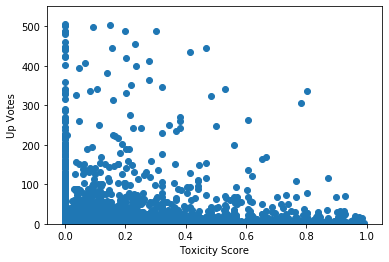

In [0]:
#print(utt_ups_tox)
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

bestfit = np.polyfit(toxvalues, upsvalues,1)
bestfitline = np.poly1d(bestfit)

plt.scatter(toxvalues, upsvalues)
plt.ylim(0,550)
plt.ylabel('Up Votes')
plt.xlabel('Toxicity Score')


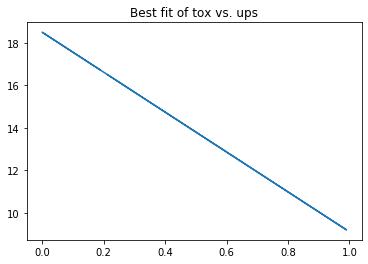

In [0]:
plt.title("Best fit of tox vs. ups")
plt.plot(toxvalues, bestfitline(toxvalues))

In [0]:
print(pearsonr(toxvalues,upsvalues)[0])

-0.014165836438686604


In [0]:
from collections import defaultdict

upstox_25 = {}
ups_25 = defaultdict(list)
tox_25 = defaultdict(list)

for x in in_top_25:
    if not utts[x].meta['ups'] == None:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [utts[x].meta['ups'], tox[x]]
        ups_25[convos[x].meta["subreddit"]].append(utts[x].meta['ups'])
        tox_25[convos[x].meta["subreddit"]].append(tox[x])
    else:
        upstox_25[x +"." + convos[x].meta["subreddit"]] = [0, tox[x]]
        ups_25[convos[x].meta["subreddit"]].append(0)
        tox_25[convos[x].meta["subreddit"]].append(tox[x])
corr_25 = {}

for x in ups_25:
    corr_25[x] = pearsonr(tox_25[x],ups_25[x])[0]
   
sorted_corr = sorted(corr_25.items(), key=lambda kv: kv[1])
for x in sorted_corr:
    print(x)

# E3: Run on another dataset

In [0]:
# Load "reddit-corpus-small"
small_reddit_corpus_raw = convokit.Corpus(convokit.download("reddit-corpus-small"))

Dataset already exists at /Users/katyblumer/.convokit/downloads/reddit-corpus-small


In [0]:
#@title Subsample dataset
num_convos = 2 #@param

sampled_utts = []
convo_sample_ids = small_reddit_corpus_raw.get_conversation_ids()[:num_convos]
for idx in convo_sample_ids:
  convo = small_reddit_corpus_raw.get_conversation(idx)
  for utt_id in convo.get_utterance_ids():
    sampled_utts.append(convo.get_utterance(utt_id))
small_reddit_corpus = convokit.Corpus(utterances=sampled_utts)
print("Sampled corpus with {} convos and {} utterances".format(len(small_reddit_corpus.get_conversation_ids()), len(small_reddit_corpus.get_utterance_ids())))

Sampled corpus with 2 convos and 28 utterances


In [0]:
# RERUN THIS CELL if you change anything in your local convoikit, then you don't 
# have to restart the kernel. 
# If you get an error on the first run, that means it's working - just run the cell again. 

# If you don't, then either your file hasn't changed or autoreload has stopped 
# working (sometimes it stops working until you restart the kernel... seems to 
# be when you use reload_ext instead of load_ext????)
%autoreload

In [0]:
reload_from_api = False
if reload_from_api:
  tox_small_reddit = convokit.Toxicity(api_key="Not currently used - is hardcoded", toxicity_path_to_save="convokit/toxicity/data/reddit_small_corpus.json")
else:
  tox_small_reddit = convokit.Toxicity(toxicity_json_path="convokit/toxicity/data/reddit_small_corpus.json")

small_reddit_corpus = tox_small_reddit.transform(small_reddit_corpus)